# **Prezicerea personalității**

## Citirea datelor

Importăm librăriile:

In [105]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importăm și citim setul de date:

In [106]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [107]:
df = pd.read_csv('/content/gdrive/My Drive/Personality prediction/Bronze/mbti_1.csv')
print(df)

      type                                              posts
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1     ENTP  'I'm finding the lack of me in these posts ver...
2     INTP  'Good one  _____   https://www.youtube.com/wat...
3     INTJ  'Dear INTP,   I enjoyed our conversation the o...
4     ENTJ  'You're fired.|||That's another silly misconce...
...    ...                                                ...
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...
8671  ENFP  'So...if this thread already exists someplace ...
8672  INTP  'So many questions when i do these things.  I ...
8673  INFP  'I am very conflicted right now when it comes ...
8674  INFP  'It has been too long since I have been on per...

[8675 rows x 2 columns]


## EDA

### Validarea și pregătirea datelor

Vizualizăm setul de date:

In [108]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


Verificăm dacă avem NaN values:


In [109]:
df.isnull().any()

type     False
posts    False
dtype: bool

Verificăm tipul datelor:

In [110]:
df.dtypes

type     object
posts    object
dtype: object

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


Analizăm setul de date:

In [112]:
df.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'The Decline of the West by Oswald Spengler.||...
freq,1832,1


In [113]:
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

Facem split la postări și dublăm tipul personalității de câte ori e nevoie:

In [114]:
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))

Number of users 8675
Number of posts 422845


In [115]:
df = pd.DataFrame(posts, columns=["types", "posts"])
print(df.shape)
print(df.head())

(422845, 2)
  types                                              posts
0  INFJ        'http://www.youtube.com/watch?v=qsXHcwe3krw
1  INFJ  http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2  INFJ  enfp and intj moments  https://www.youtube.com...
3  INFJ  What has been the most life-changing experienc...
4  INFJ  http://www.youtube.com/watch?v=vXZeYwwRDw8   h...


### Analiza multivariată

Analizăm ce tipuri de personalități avem și câte postări:

In [116]:
total = df.groupby(['types']).count()
total

,posts
types,
ENFJ,9288
ENFP,32769
ENTJ,11273
ENTP,33761
ESFJ,2018
ESFP,2215
ESTJ,1921
ESTP,4337
INFJ,72105


Graficele numărului total de postări pentru fiecare tip de personalitate:

Text(0.5, 1.0, 'Total posts for each personality type')

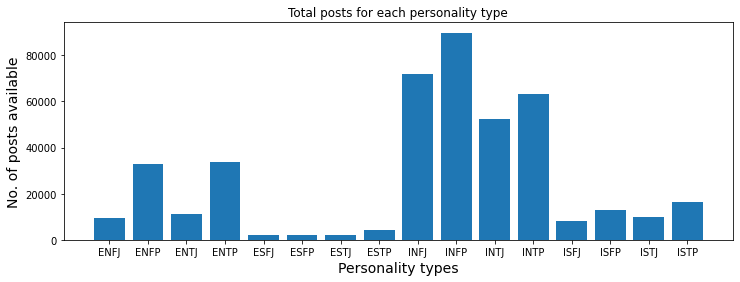

In [117]:
plt.figure(figsize = (12,4))
plt.bar(np.array(total.index), height = total['posts'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


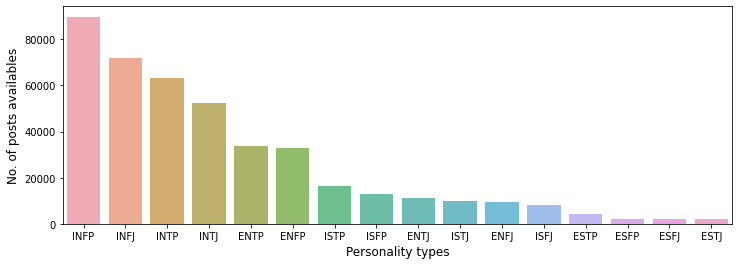

In [118]:
cnt_srs = df['types'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

### Analiza univariată

Vom împărți fiecare personalitate pe litere:

In [119]:
df['Letter1'] = df.apply(lambda row: row.types[0], axis = 1)
df['Letter2'] = df.apply(lambda row: row.types[1], axis = 1)
df['Letter3'] = df.apply(lambda row: row.types[2], axis = 1)
df['Letter4'] = df.apply(lambda row: row.types[3], axis = 1)
df = df.drop(df.columns[0], axis=1)
print(df)

                                                    posts  ... Letter4
0             'http://www.youtube.com/watch?v=qsXHcwe3krw  ...       J
1       http://41.media.tumblr.com/tumblr_lfouy03PMA1q...  ...       J
2       enfp and intj moments  https://www.youtube.com...  ...       J
3       What has been the most life-changing experienc...  ...       J
4       http://www.youtube.com/watch?v=vXZeYwwRDw8   h...  ...       J
...                                                   ...  ...     ...
422840  I was going to close my facebook a few months ...  ...       P
422841  30 Seconds to Mars - All of my collections. It...  ...       P
422842  I have seen it, and i agree. I did actually th...  ...       P
422843  Ok so i have just watched Underworld 4 (Awaken...  ...       P
422844  I would never want to turn off my emotions. so...  ...       P

[422845 rows x 5 columns]


Am obținut un dataframe cu 422845 de rânduri și 5 coloane.

Vom scăpa de dubluri:

In [120]:
df = df.drop_duplicates()

In [121]:
df.shape

(419055, 5)

Vom scăpa de valori lipsă, dacă avem:

In [122]:
df = df.dropna()

In [123]:
df.shape

(419055, 5)

Am obținut un dataframe final cu 419055 de rânduri și 5 coloane. Cu acesta și vom lucra pe tot parcursul proiectului.

Analizăm numărul de postări per literă:

In [124]:
letter1 = df[['posts','Letter1']].groupby(['Letter1']).count()
letter1

,posts
Letter1,
E,96550
I,322505


Text(0.5, 1.0, 'Total posts for each personality type per letter')

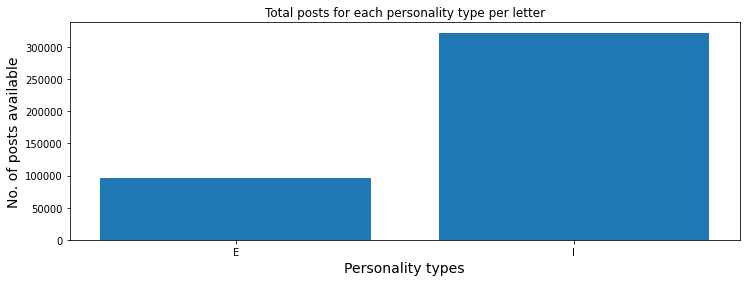

In [125]:
plt.figure(figsize = (12,4))
plt.bar(np.array(letter1.index), height = letter1['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type per letter')

In [126]:
letter2 = df[['posts','Letter2']].groupby(['Letter2']).count()
letter2

,posts
Letter2,
N,361537
S,57518


Text(0.5, 1.0, 'Total posts for each personality type per letter')

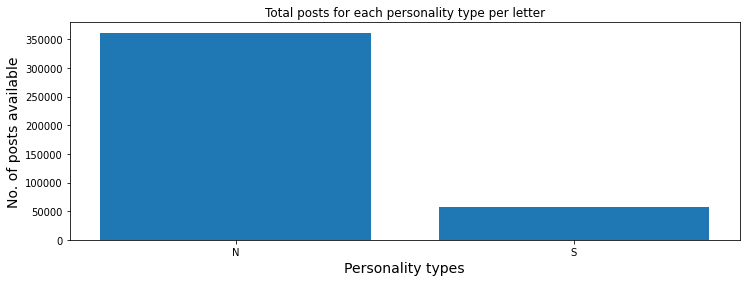

In [127]:
plt.figure(figsize = (12,4))
plt.bar(np.array(letter2.index), height = letter2['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type per letter')

In [128]:
letter3 = df[['posts','Letter3']].groupby(['Letter3']).count()
letter3

,posts
Letter3,
F,227253
T,191802


Text(0.5, 1.0, 'Total posts for each personality type per letter')

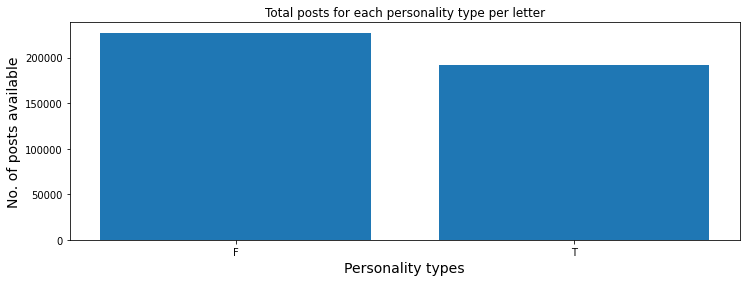

In [129]:
plt.figure(figsize = (12,4))
plt.bar(np.array(letter3.index), height = letter3['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type per letter')

In [130]:
letter4 = df[['posts','Letter4']].groupby(['Letter4']).count()
letter4

,posts
Letter4,
J,165684
P,253371


Text(0.5, 1.0, 'Total posts for each personality type per letter')

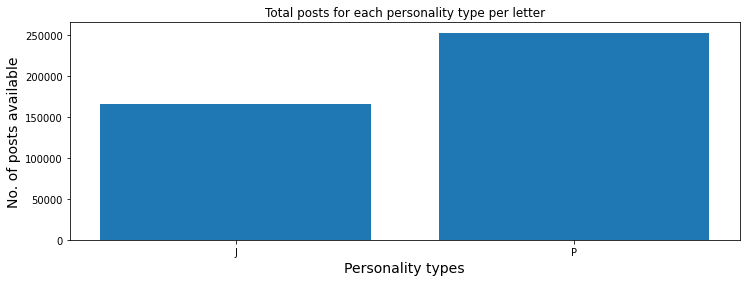

In [131]:
plt.figure(figsize = (12,4))
plt.bar(np.array(letter4.index), height = letter4['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type per letter')

## Preprocesarea postărilor

Vom șterge părțile în plus, vom lăsa doar denumirea rețelei sociale, scoatem stopwords, punctuația, trasnformăm în caractere mici și facem tokenizarea: - modifica!!!



In [132]:
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
regex = '(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'
df['posts'] = df['posts'].replace(to_replace = regex, value = np.NaN, regex=True)
df = df.dropna()
posts = df['posts'].values
for i in range(len(posts)):
  posts[i] = ' '.join([porter.stem(word.lower()) for word in tokenizer.tokenize(posts[i]) if word.lower() not in stop])
df['posts'] = posts

Vizualizăm dataframe-ul:


In [134]:
df.head()

,posts,Letter1,Letter2,Letter3,Letter4
3,life chang experi life,I,N,F,J
5,may perc experi immers,I,N,F,J
7,hello enfj7 sorri hear distress natur relation...,I,N,F,J
9,welcom stuff,I,N,F,J
11,prozac wellbrutin least thirti minut move leg ...,I,N,F,J


In [135]:
df.tail()

,posts,Letter1,Letter2,Letter3,Letter4
422840,go close facebook month back well want abl mes...,I,N,F,P
422841,30 second mar collect seem fit mood right,I,N,F,P
422842,seen agre actual think first time watch movi b...,I,N,F,P
422843,ok watch underworld 4 awaken must say realli g...,I,N,F,P
422844,would never want turn emot sometim hide world ...,I,N,F,P


### Analiza celor mai frecvente cuvinte

Facem Frequency Distribution:

In [136]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
def counter(text, column_text, quantity, title):
    frequency = nltk.FreqDist(' '.join(list(text[column_text].apply(lambda x: ' '.join(x)))).split())  
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.show()

Vom reprezenta grafic frecvența cuvintelor per literă:

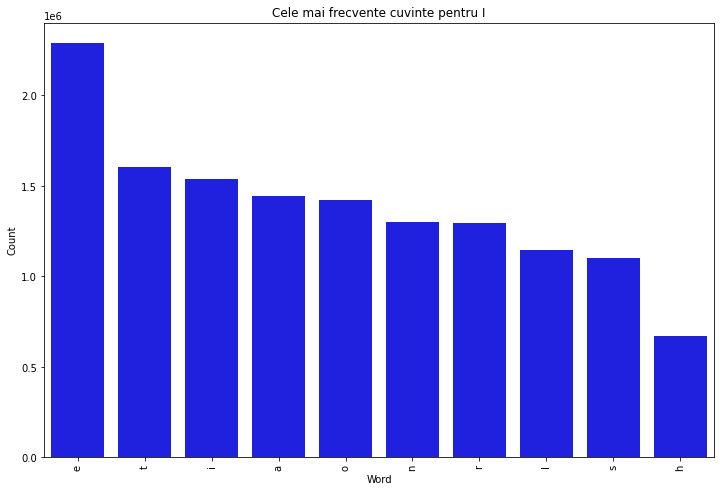

In [137]:
counter(df[df['Letter1'].str.contains("I")], 'posts', 10, 'Cele mai frecvente cuvinte pentru I')

In [ ]:
counter(df[df['Letter1'].str.contains("E")], 'post', 10, 'Cele mai frecvente cuvinte pentru E')

In [ ]:
counter(df[df['Letter2'].str.contains("N")], 'post', 10, 'Cele mai frecvente cuvinte pentru N')

In [ ]:
counter(df[df['Letter2'].str.contains("S")], 'post', 10, 'Cele mai frecvente cuvinte pentru S')

In [ ]:
counter(df[df['Letter3'].str.contains("T")], 'post', 10, 'Cele mai frecvente cuvinte pentru T')

In [ ]:
counter(df[df['Letter3'].str.contains("F")], 'post', 10, 'Cele mai frecvente cuvinte pentru F')

In [ ]:
counter(df[df['Letter4'].str.contains("J")], 'post', 10, 'Cele mai frecvente cuvinte pentru J')

In [ ]:
counter(df[df['Letter4'].str.contains("P")], 'post', 10, 'Cele mai frecvente cuvinte pentru P')

In [ ]:
counter(df, 'post', 20, 'Cele mai frecvente cuvinte în tot setul de date')

## Modelarea

In [138]:
df = df.sample(frac = 1)

Vom crea 4 modele: câte unul pentru fiecare pereche de litere din tipul personalității.

Importăm librărille necesare:

In [139]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [144]:
from joblib import dump, load

Modelul lucrează doar cu string-uri, de aceea vom transforma listele de token-uri în string-uri:

### Modelul pentru perechea 1

Vom crea dataframe-ul necesar:

In [140]:
df1 = df[['posts', 'Letter1']]
df1

,posts,Letter1
416874,mom xstj dad xntp,I
152946,post rock realli good well lot idm artist writ...,I
377340,hello beauti peopl person alway test big prefe...,I
356372,besid nibbl someon heart today ate slice tomat...,I
395382,know feel know big question whether whole pict...,I
...,...,...
361399,ever bodi experi talk star strang notic stop f...,E
356269,want anyth seriou probabl see peopl side entj ...,E
78510,lost troll particularli concern desir exclus c...,E
259401,extrem confid ne think either fi come fe stron...,I


Împărțim setul de date în datele pentru antrenare și datele pentru prezicere:

In [141]:
X1 = df1['posts']
y1 = df1['Letter1']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

Creăm modelul:

In [142]:
pipe1 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
# Antrenăm modelul
model1 = pipe1.fit(X_train1, y_train1)
# Prezicem valorile
prediction1 = model1.predict(X_test1)

accuracy: 76.93%
              precision    recall  f1-score   support

           E       0.53      0.06      0.11     30241
           I       0.78      0.98      0.87     99773

    accuracy                           0.77    130014
   macro avg       0.66      0.52      0.49    130014
weighted avg       0.72      0.77      0.69    130014



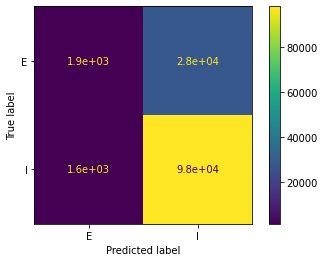

In [143]:
print("accuracy: {}%".format(round(accuracy_score(y_test1, prediction1)*100,2)))
print(metrics.classification_report(y_test1, prediction1))
plot_confusion_matrix(model1, X_test1, y_test1)  
plt.show()

In [145]:
dump(model1, '/content/gdrive/MyDrive/Personality prediction/Modele/modelul1.joblib')

['/content/gdrive/MyDrive/Personality prediction/Modele/modelul1.joblib']

### Modelul pentru perechea 2


Vom crea dataframe-ul necesar:

In [147]:
df2 = df[['posts', 'Letter2']]
df2

,posts,Letter2
416874,mom xstj dad xntp,N
152946,post rock realli good well lot idm artist writ...,N
377340,hello beauti peopl person alway test big prefe...,S
356372,besid nibbl someon heart today ate slice tomat...,N
395382,know feel know big question whether whole pict...,N
...,...,...
361399,ever bodi experi talk star strang notic stop f...,N
356269,want anyth seriou probabl see peopl side entj ...,N
78510,lost troll particularli concern desir exclus c...,N
259401,extrem confid ne think either fi come fe stron...,N


Împărțim setul de date în datele pentru antrenare și datele pentru prezicere:

In [148]:
X2 = df2['posts']
y2 = df2['Letter2']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

Creăm modelul:

In [149]:
pipe2 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
# Antrenăm modelul
model2 = pipe2.fit(X_train2, y_train2)
# Prezicem valorile
prediction2 = model2.predict(X_test2)

Evaluăm:

accuracy: 86.16%
              precision    recall  f1-score   support

           N       0.86      1.00      0.93    112186
           S       0.38      0.01      0.03     17828

    accuracy                           0.86    130014
   macro avg       0.62      0.51      0.48    130014
weighted avg       0.80      0.86      0.80    130014



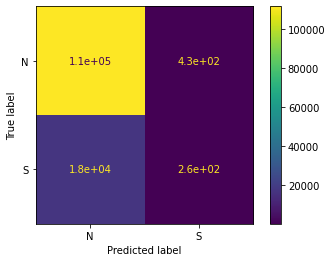

In [150]:
print("accuracy: {}%".format(round(accuracy_score(y_test2, prediction2)*100,2)))
print(metrics.classification_report(y_test2, prediction2))
plot_confusion_matrix(model2, X_test2, y_test2)  
plt.show()

In [151]:
dump(model2, '/content/gdrive/MyDrive/Personality prediction/Modele/modelul2.joblib')

['/content/gdrive/MyDrive/Personality prediction/Modele/modelul2.joblib']

### Modelul pentru perechea 3

Vom crea dataframe-ul necesar:

In [153]:
df3 = df[['posts', 'Letter3']]
df3

,posts,Letter3
416874,mom xstj dad xntp,F
152946,post rock realli good well lot idm artist writ...,T
377340,hello beauti peopl person alway test big prefe...,T
356372,besid nibbl someon heart today ate slice tomat...,F
395382,know feel know big question whether whole pict...,F
...,...,...
361399,ever bodi experi talk star strang notic stop f...,T
356269,want anyth seriou probabl see peopl side entj ...,T
78510,lost troll particularli concern desir exclus c...,F
259401,extrem confid ne think either fi come fe stron...,F


Împărțim setul de date în datele pentru antrenare și datele pentru prezicere:

In [155]:
X3 = df3['posts']
y3 = df3['Letter3']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.33, random_state=42)

Creăm modelul:

In [162]:
pipe3 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
# Antrenăm modelul
model3 = pipe3.fit(X_train3, y_train3)
# Prezicem valorile
prediction3 = model3.predict(X_test3)

Evaluăm:

accuracy: 60.92%
              precision    recall  f1-score   support

           F       0.62      0.74      0.67     70668
           T       0.59      0.46      0.52     59346

    accuracy                           0.61    130014
   macro avg       0.61      0.60      0.59    130014
weighted avg       0.61      0.61      0.60    130014



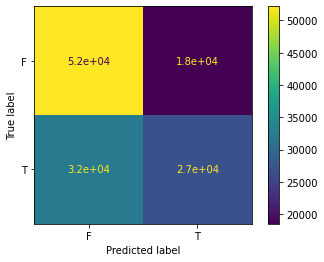

In [163]:
print("accuracy: {}%".format(round(accuracy_score(y_test3, prediction3)*100,2)))
print(metrics.classification_report(y_test3, prediction3))
plot_confusion_matrix(model3, X_test3, y_test3)  
plt.show()

Concluzie:

In [164]:
dump(model3, '/content/gdrive/MyDrive/Personality prediction/Modele/modelul3.joblib')

['/content/gdrive/MyDrive/Personality prediction/Modele/modelul3.joblib']

### Modelul pentru perechea 4




Vom crea dataframe-ul necesar:

In [165]:
df4 = df[['posts', 'Letter4']]
df4

,posts,Letter4
416874,mom xstj dad xntp,P
152946,post rock realli good well lot idm artist writ...,J
377340,hello beauti peopl person alway test big prefe...,P
356372,besid nibbl someon heart today ate slice tomat...,J
395382,know feel know big question whether whole pict...,P
...,...,...
361399,ever bodi experi talk star strang notic stop f...,P
356269,want anyth seriou probabl see peopl side entj ...,J
78510,lost troll particularli concern desir exclus c...,P
259401,extrem confid ne think either fi come fe stron...,P


Împărțim setul de date în datele pentru antrenare și datele pentru prezicere:

In [166]:
X4 = df4['posts']
y4 = df4['Letter4']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.33, random_state=42)

Creăm modelul:

In [167]:
pipe4 = Pipeline([('vect', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy", random_state = 2))])
# Antrenăm modelul
model4 = pipe4.fit(X_train4, y_train4)
# Prezicem valorile
prediction4 = model4.predict(X_test4)

Evaluăm:

accuracy: 61.71%
              precision    recall  f1-score   support

           J       0.55      0.21      0.30     51663
           P       0.63      0.89      0.74     78351

    accuracy                           0.62    130014
   macro avg       0.59      0.55      0.52    130014
weighted avg       0.60      0.62      0.56    130014



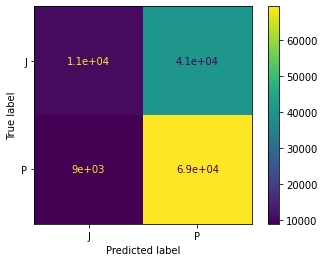

In [168]:
print("accuracy: {}%".format(round(accuracy_score(y_test4, prediction4)*100,2)))
print(metrics.classification_report(y_test4, prediction4))
plot_confusion_matrix(model4, X_test4, y_test4)  
plt.show()

Concluzie:

In [169]:
dump(model4, '/content/gdrive/MyDrive/Personality prediction/Modele/modelul4.joblib')

['/content/gdrive/MyDrive/Personality prediction/Modele/modelul4.joblib']

# Concluzii

# Bibliografie